In [42]:
import pandas as pd
from PIL import Image
import glob
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [74]:
lux_readings = pd.read_csv("10_7_Data_Collection.csv", encoding='unicode_escape')
lux_readings["yuv_average_y"] = ""
lux_readings["relative_illuminance"] = ""
lux_readings["lux_average"] = lux_readings.iloc[:, 2:5].mean(axis=1)

#### Convert image into YUV channel and take average of Y (brightness?)

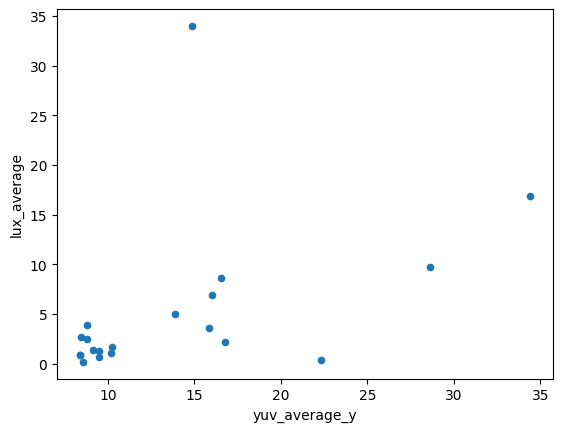

In [73]:

##

for filename in glob.iglob("2024-10-07/annotated_exports/*"):
    image_id = filename[filename.index('20241007-') + 9:filename.index('.dng')]

    if ("A" in image_id):
        image_id = image_id.replace("A", "B")
    else:
        image_id = image_id.replace("B", "A")

    img = cv.imread(filename)
    img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
    y, u, v = cv.split(img_yuv)

    avg_y = np.mean(y)

    row_idx = lux_readings.loc[lux_readings["ID"] == image_id].index[0]

    lux_readings.loc[row_idx, "yuv_average_y"] = avg_y

# Plot brightness values against avg lux readings
ax1 = lux_readings.plot.scatter(x="yuv_average_y", y="lux_average")

#### Getting Illuminance Relative from EXIF
https://stackoverflow.com/questions/13866567/calculate-illuminance-from-exif-data

In [71]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS, IFD
from pillow_heif import register_heif_opener
import pillow_avif

# register_heif_opener()

# image = Image.open("2024-10-07/annotated_exports/20241007-5A.dng")
# exifdata = image.getexif()

# for ifd_id in IFD:
#     try:
#         ifd = exifdata.get_ifd(ifd_id)

#         if ifd_id == IFD.GPSInfo:
#             resolve = GPSTAGS
#         else:
#             resolve = TAGS

#         for k, v in ifd.items():
#             tag = resolve.get(k, k)
#             if tag in ["FNumber", "ExposureTime", "ISOSpeedRatings"]:
#                 print(tag, v)
#     except KeyError:
#         pass

ExposureTime 0.01
FNumber 3.5
ISOSpeedRatings 3200


In [75]:
## FNumber: 3.5
## ExposureTime: 0.01
## ISOSpeedRatings: 3200

# f_number = 3.5
# exposure_time = 0.01
# iso_speed_ratings = 3200

for filename in glob.iglob("2024-10-07/annotated_exports/*"):
    image_id = filename[filename.index('20241007-') + 9:filename.index('.dng')]

    if ("A" in image_id):
        image_id = image_id.replace("A", "B")
    else:
        image_id = image_id.replace("B", "A")

    # lux = (f_number * f_number / (exposure_time * iso_speed_ratings))



    # img = cv.imread(filename)
    # img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
    # y, u, v = cv.split(img_yuv)

    # avg_y = np.mean(y)

    # row_idx = lux_readings.loc[lux_readings["ID"] == image_id].index[0]

    lux_readings.loc[row_idx, "yuv_average_y"] = avg_y

SyntaxError: invalid syntax (1723450466.py, line 17)